# Исследование игр

**Оглавление**
1. [Описание проекта](#description)
2. [Описание данных](#rate)
3. [Обзор данных](#data_review)
4. [Предобработка данных](#preprocessing)
5. [Исследовательский анализ данных](#analysis)
6. [Портрет пользователя каждого региона](#region)
7. [Проверка гипотез](#hypothesis)
8. [Общий вывод](#output)

## Описание проекта
<a id="description"></a>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных
<a id="rate"></a>

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.*

## Обзор данных
<a id="data_review"></a>

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
# посмотрим первые 5 строк
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датасете 11 столбцов и 16715 строк. В столбце `Year_of_Release` тип данных изменим на int. В столбце `User_Score` на float.

Названия колонок приведём к нижнему регистру.

In [5]:
# проверим сумму пропусков
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

В датасете много пропусков

In [6]:
# проверим наличие дубликатов
df.duplicated().sum()

0

Явных дубликатов нет.

In [7]:
# проверим разброс значений
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


На первый взгляд с данными всё в порядке. Отрицательных и явно выбивающихся значений нет.

## Предобработка данных
<a id="preprocessing"></a>

* Заменим названия столбцов (приведем к нижнему регистру);
* Преобразуем типы данных;
* Обработайем пропуски;
* Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [8]:
# приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [9]:
# заменим год выпуска на целочисленный
df['year_of_release'] = df['year_of_release'].astype('Int32')

Пропуски в столбце `year_of_release` удалять не будем

In [10]:
# проверим пропуски в столбце name
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данных пропущены 2 строки с названиями игр. Обе игры вышли на платферме GEN в 1993 году. В 1993 году на этой платформе выпустили несколько игр. Также в этих строках не указаны жанр и рейтинги. Название установить не получится. Эти данные бесполезны для статистики, поэтому удалим их

In [11]:
df.dropna(subset=['name'], inplace=True)
df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(5), object(5)
memory usage: 1.5+ MB


In [12]:
# посмотрим на значение 'tbd' в оценке пользователей
df[df['user_score']=="tbd"].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


Закономерности в появлении этого значения на первый взгляд не видно.

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.
https://mobilradio.ru/information/vocabulary/tbd.htm

Обработаем эти значения как NaN. Строковые значения в `user_score` поменяем на тип данных float для удобства расчетов.

In [13]:
# заменим тип данных в столбце user_score методом to_numeric. Аргумент errors='coerce' 
# добавим, чтобы 'tbd' поменялось на NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [14]:
# изучим первые 5 пропущенных значений по рейтингу
df[df['rating'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


В появлении пропусках есть закономерность. Если пропущено значение в столбце `rating` в столбцах в столбцах `critic_score` и `user_score` тоже пусто. Проверив несколько игр в сети интернет можно увидеть, что рейтинг ESRB играм присвоен. Скорей всего какая-то техническая ошибка в базах данных. Это можно сказать и об оценках. Пропущенные игры, как видно из таблицы, принесли большой доход. Сомнительно, что они не получили оценку критиков и пользователей. Какждую игру перебирать вручную очень долго. Поэтому оставим пропуски как есть.

Удалять строки с пропусками в рейтинге не будем, чтобы не исказить статистику. Заменим на `no info` в столбце `rating` и на `999` в столбцах `critic_score` и `user_score`.

In [15]:
df['critic_score'] = df['critic_score'].fillna(999)
df['user_score'] = df['user_score'].fillna(999)
df['rating'] = df['rating'].fillna('no info')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.5+ MB


In [16]:
# добавим столбец с суммарными продажами по всем регионам
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,999.0,999.0,no info,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,999.0,999.0,no info,31.38


## Исследовательский анализ данных
<a id="analysis"></a>

### Выпуск игр в разные годы

Посмотрим, сколько игр выпускалось в разные годы.

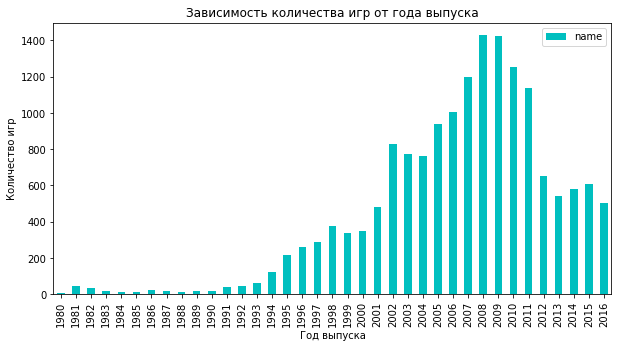

In [17]:
# проверим разброс выпуска игр по годам
df.pivot_table(index = 'year_of_release', values = 'name', 
               aggfunc = 'count').plot(kind='bar', color='c',figsize=(10,5))
plt.title('Зависимость количества игр от года выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Темп появления новых игр начал уверенно расти с 1994 года. В 2008-2009 был самый пик популярности компьютерных игр. В 2012 темп выпуска снизился почти в два раза и держался примерно на одном уровне до 2016 года.

### Анализ срока жизни игровых платформ

Изучим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [18]:
platform_top = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', 
                                                                       ascending = False).head()
platform_top

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


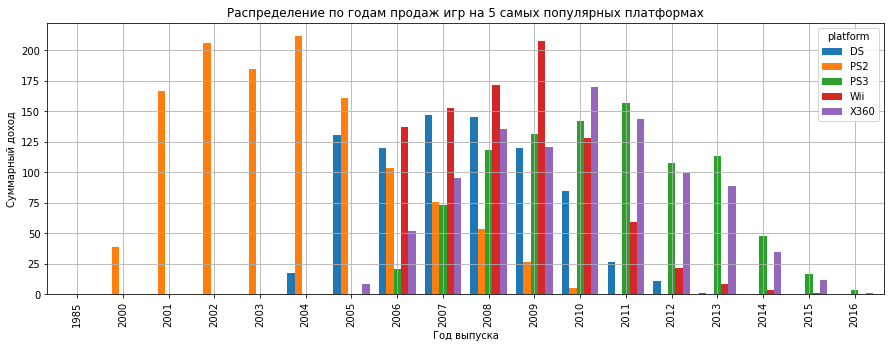

In [19]:
platform_top_query = df.query('platform in @platform_top.index').pivot_table(
    index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum'
).plot(kind='bar', figsize=(15, 5), width=0.8, grid=True)
plt.title('Распределение по годам продаж игр на 5 самых популярных платформах')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарный доход')
plt.show()

Исходя из статистики средний срок срок существования игровых платформ составляет 10 лет. Пика популярности платформа достигает через 4-6 лет после релиза. Далее продажи идут на спад и достигают нуля. Топ-5 игровых платформ за 31 год к 2016 ушли в прошлое. Только X360 и PS3 в 2016 году еще приносили незначительный доход. Но судя по тенденции они тоже вскоре покинут рынок.

Для прогнозирования потенциально прибыльной платформы возьмем промежуток в 3 года с 2014 по 2016 года. Не будем брать слишком длинный временной отрезок, т.к. рынок компьютерных игр очень динамичен. Так мы увидим прибыль от каких платформ пошла на спад, а какие только набирают популярность.

### Потенциально прибыльные платформы

Проанализируем как менялись продажи по платформам. Выберим несколько потенциально прибыльных платформ.
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [20]:
# сделаем срез с 2014 по 2016 гг
df_year = df.query('year_of_release>=2014')

In [21]:
# посмотрим топ-5 платформ по продажам за актуальный период
platform_top_year = df_year.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', 
                                                                       ascending = False).head()
platform_top_year

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


По продажам по прежнему в 5 лидеров PS3	и X360. Более новая версия PS4 лидирует по продажам. Рассмотрим более подробно на графике.

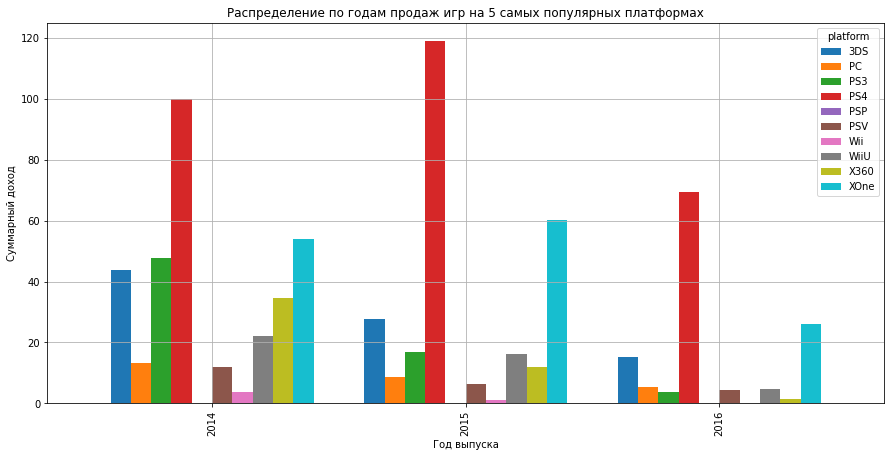

In [22]:
# построим рапределение продаж на платформах по годам за актуальный период
df_year.pivot_table(
    index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum'
).plot(kind='bar', figsize=(15, 7), width=0.8, grid=True)
plt.title('Распределение по годам продаж игр на 5 самых популярных платформах')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарный доход')
plt.show()

На графике видно, что 2016 год был не слишком прибыльным в плане продаж компьютерных игр. Выделяются платформы PS4, XOne, которые появились в 2013 году, но уже стартанули вверх по продажам. Исходя из статистики эти платформы просуществуют на рынке как минимум 6 лет, а в 2017 году ещё могут побороться за звание самых продаваемых.
Продажи по всем остальным платформам сильно падают.

Text(0, 0.5, 'Платформа')

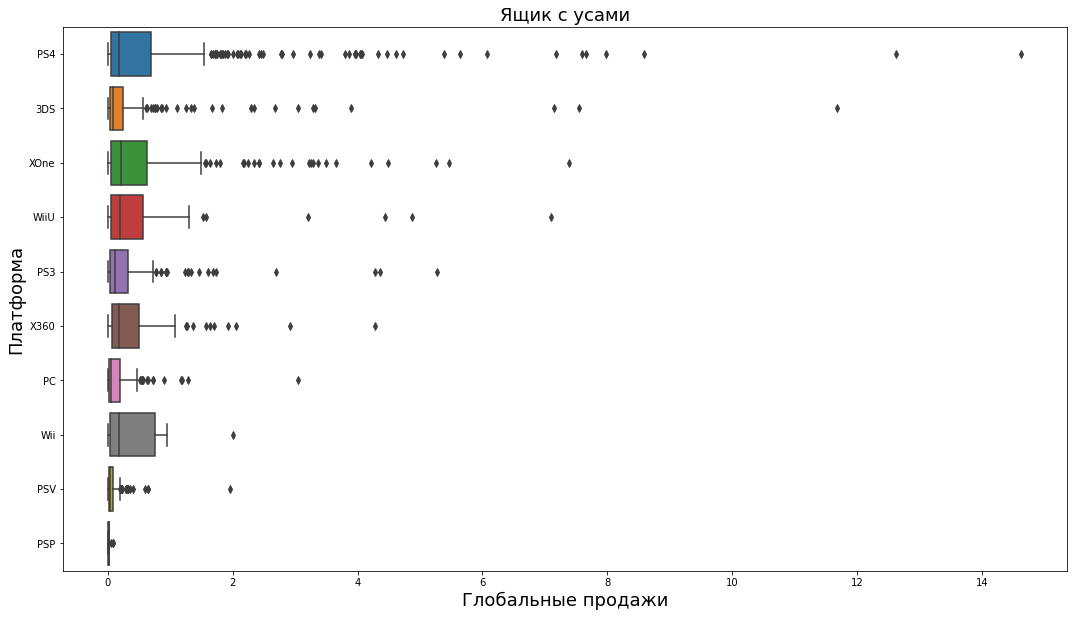

In [23]:
# построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(18,10))
sns.boxplot(data=df_year, x='total_sales', y='platform')
plt.title('Ящик с усами', fontsize=18)
plt.xlabel('Глобальные продажи', fontsize=18)
plt.ylabel('Платформа', fontsize=18)

Text(0, 0.5, 'Платформа')

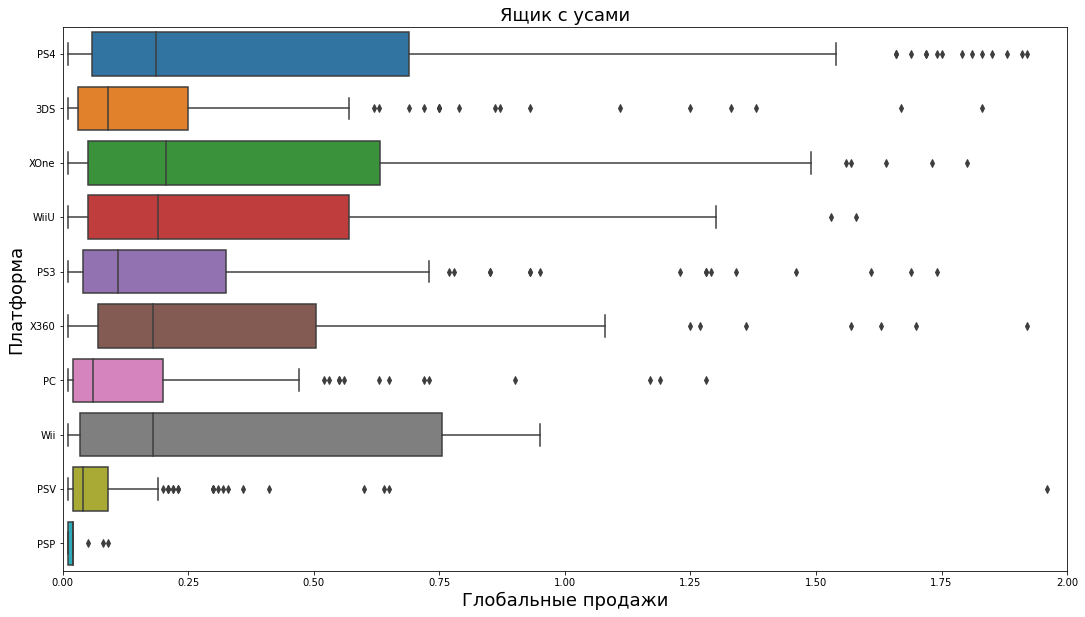

In [24]:
# рассмотрим график поближе
plt.figure(figsize=(18,10))
sns.boxplot(data=df_year, x='total_sales', y='platform')
plt.xlim(0,2)
plt.title('Ящик с усами', fontsize=18)
plt.xlabel('Глобальные продажи', fontsize=18)
plt.ylabel('Платформа', fontsize=18)

У PS4, XOne, WiiU, Wii, X360 самый широкий межквартильный размах. Мединаны этих платформ больше остальных. Можно сделать вывод, что продажи по этим платформам наиболее стабильны, а платформа WiiU, которая появилась в 2012, на которую мы не обратили внимание на предыдущих графиках тоже может в будущем стать популярной. Wii и X360 прошли пик популярности достаточно давно, поэтому не будем делать на две эти платформы ставку в 2017.

### Отзывы

Посмотрим, как влияют на продажи внутри самой популярной платформы PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
Сравним с продажами игр на других платформах.

In [25]:
# сделаем срез для PS4, отбросим лишние значения
platform_ps4 = df_year.query('platform == "PS4" & critic_score <= 100 & user_score <= 10')
# посмотрим корреляцию для PS4
platform_ps4[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.401903
user_score,0.546434,1.000000,-0.043186
total_sales,0.401903,-0.043186,1.000000


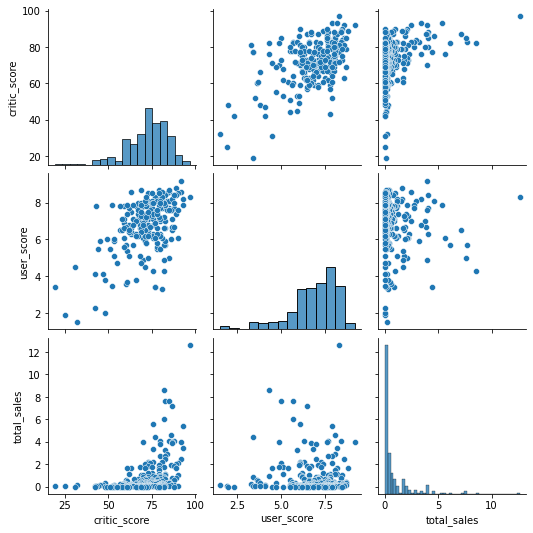

In [26]:
# построим матрицу диаграм рассеяния для PS4
sns.pairplot(platform_ps4[['critic_score', 'user_score', 'total_sales']])

In [27]:
# сделаем срез, отбросим лишние значения
review = df_year.query('critic_score <= 100 & user_score <= 10')
# посмотрим корреляцию
review[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.504460,0.325363
user_score,0.504460,1.000000,0.005202
total_sales,0.325363,0.005202,1.000000


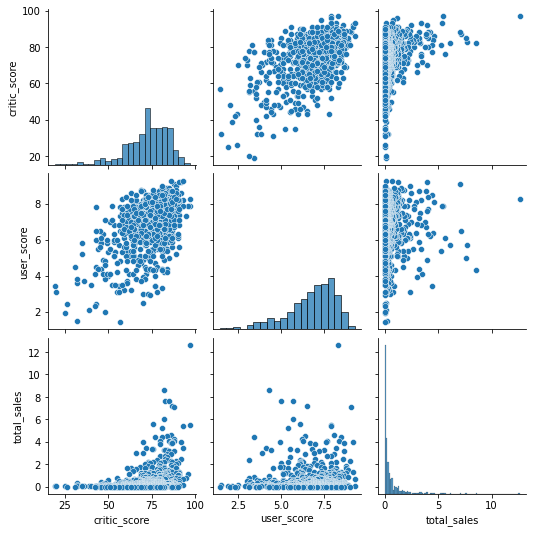

In [28]:
# построим матрицу диаграм рассеяния для всех платформ
sns.pairplot(review[['critic_score', 'user_score', 'total_sales']])

Корреляция между продажами и отзывами критиков положительная как в случае самой популярной платформы, так и в среднем по остальным играм. 

Как видно из диаграм рассеяния и корреляции отзывы критиков очень повлияли на продажи как X360 так и остальных игровых платформ. Если отзывы критиков высокие, то и продажи соответственно выше. 

Отзывы пользователей не настолько сильно влияют на популярность игр, но тоже имеют свой вес. Покупатели больше доверяют мнению профессионалов.

Между отзывами критиков и пользователей тоже есть связь. На оценку пользователей также влияет мнегие профессионалов.

Можно ещё отметить тот факт что если критикам нравится игра, то очень часто и оценка пользователя будет высокой, если смотреть в среднем по платформам.

### Жанры

Посмотрим на общее распределение игр по жанрам

Text(0, 0.5, '')

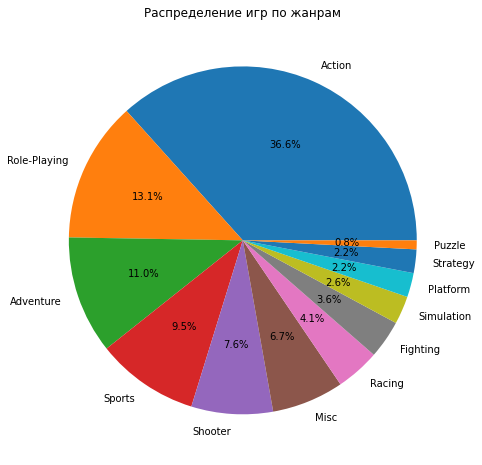

In [29]:
# посмотрим как распределяются игры по жанрам
df_year['genre'].value_counts().plot(kind='pie', figsize=(8, 8), legend=False, autopct='%1.1f%%')
plt.title('Распределение игр по жанрам')
plt.ylabel('')

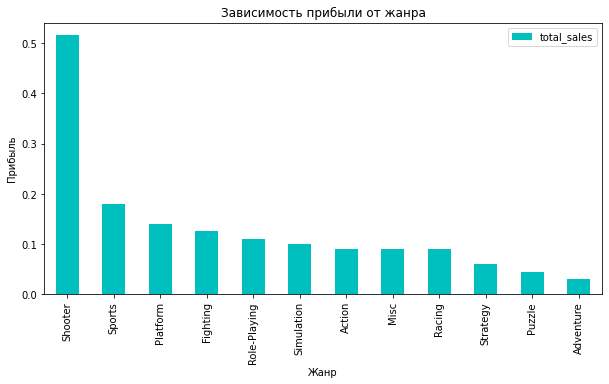

In [30]:
# построим график по прибыли от жанров
df_year.pivot_table(index = 'genre', values = 'total_sales', 
aggfunc = 'median').sort_values(by='total_sales', ascending = False).plot(
kind='bar', color='c',figsize=(10,5)
)
plt.title('Зависимость прибыли от жанра')
plt.xlabel('Жанр')
plt.ylabel('Прибыль')
plt.show()

Action - самый популярный жанр по количеству выпущенных игр, но не самый прибыльный. Его доля от общего количества составляет треть (31,6 %). Shooter очень дорогостоящий жанр. Жанр Adventure находится на 3 месте по числу всех игр, но это один из самых неприбыльных жанров. Жанры Puzzle и Strategy на последнем месте как по количеству выпускаемых игр, так и по прибыли.

## Портрет пользователя каждого региона
<a id="region"></a>

### Самые популярные платформы (топ-5)

In [31]:
# функция для построения графика по топ-5
def plot_top5 (index, values, ax, title, xlabel, ylabel):
    pivot =  df.pivot_table(
    index=index, values=values, aggfunc='sum').sort_values(by=values, ascending = False).head()
    pivot.plot(kind='bar', color='c', ax=axes[ax])
    axes[ax].set_title(title)
    axes[ax].set_xlabel(xlabel)
    axes[ax].set_ylabel(ylabel)

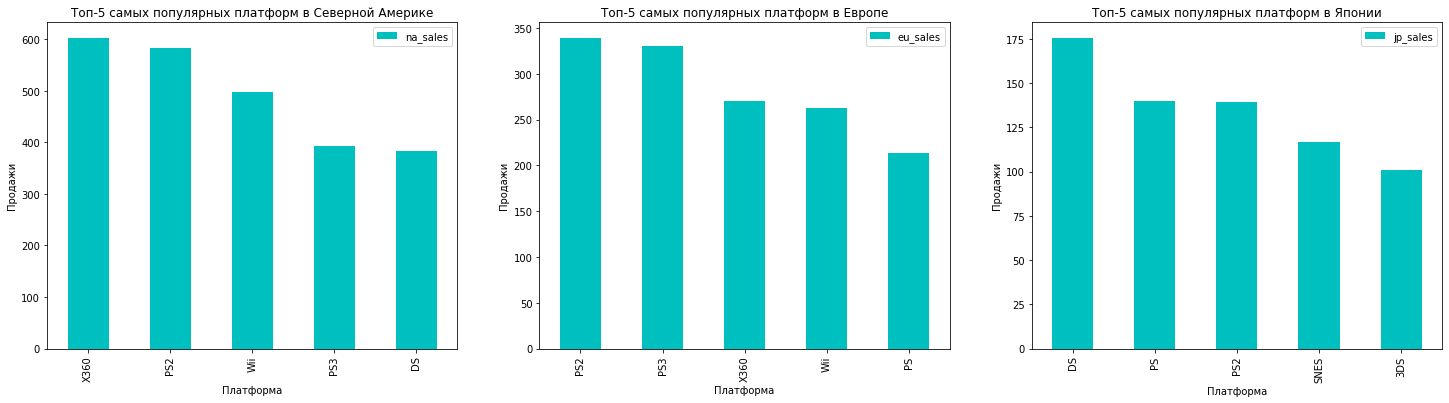

In [32]:
# выведем графики по топ-5 самых популярных платформ по регионам
fig, axes = plt.subplots(1, 3, figsize=(25,6))
plot_top5 ('platform','na_sales', 0, 'Топ-5 самых популярных платформ в Северной Америке', 'Платформа','Продажи')
plot_top5 ('platform','eu_sales', 1, 'Топ-5 самых популярных платформ в Европе', 'Платформа', 'Продажи')
plot_top5 ('platform','jp_sales', 2, 'Топ-5 самых популярных платформ в Японии', 'Платформа', 'Продажи')

PS2 - одна из самых популярных игр по всем регионам. Её ранняя и поздняя версии PS и PS3 также вошли пятерку лидеров по регионам.

X360 и Wii популярны как в Северной Америке, так и в Европе. X360 самая продаваемая игра в Северной Америке.

В Европе на первом и втором месте PS2 и PS3, PS на пятом.

У японцев совсем ддругая картина. Лидер продаж DS, которая не вошла в топ-5 в Европе, но на пятом месте рейтинга по Северной Америке. PS и PS2 на втором и третьем месте. На 4 и 5 месте японские игры SNES и 3DS.

### Самые популярные жанры (топ-5)

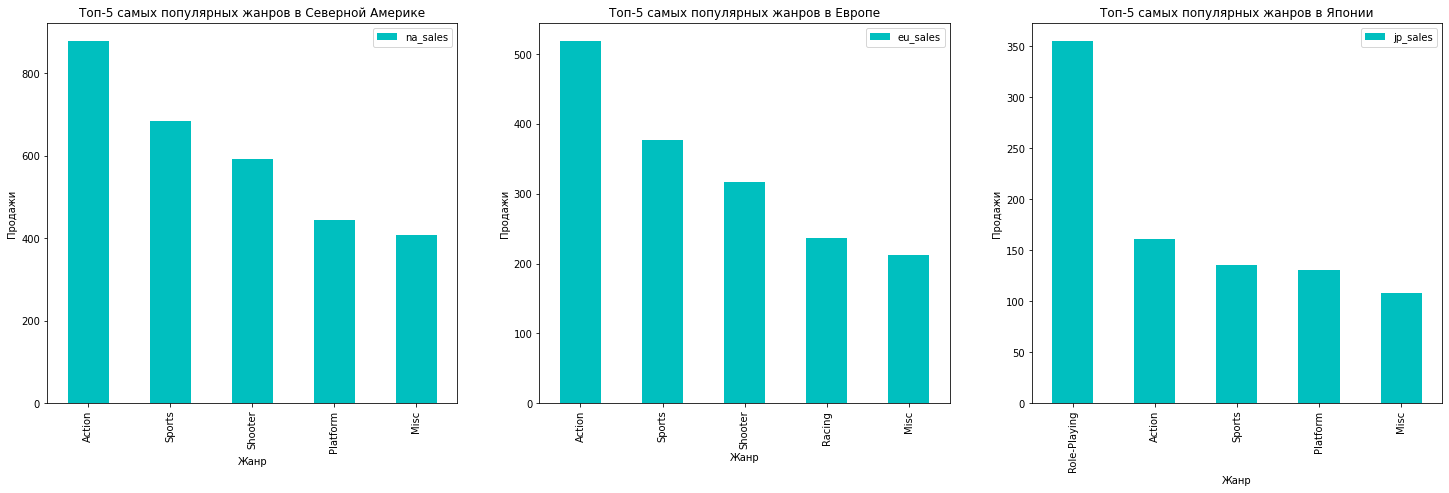

In [33]:
# выведем графики по топ-5 самых популярных жанров по регионам
fig, axes = plt.subplots(1, 3, figsize=(25,7))
plot_top5 ('genre','na_sales', 0, 'Топ-5 самых популярных жанров в Северной Америке', 'Жанр','Продажи')
plot_top5 ('genre','eu_sales', 1, 'Топ-5 самых популярных жанров в Европе', 'Жанр', 'Продажи')
plot_top5 ('genre','jp_sales', 2, 'Топ-5 самых популярных жанров в Японии', 'Жанр', 'Продажи')

Жанры Action, Sports и Misc входят в топ-5 по продажам во всех регионах. 

Продажи игр в Северной Америке самые большие по всем жанрам. 

В Японии меньше покупают игры, чем в других регионах. Role-Playing самый популярный жанр в Японии. В остальных страных этот жанр даже не входит в пятерку лидеров. Японцы также неохотно покупают игры жанра Shooter.

Игры на Platform на 4 месте по продажам в Японии и Северной Америке. У Европейцев этот жанр не популярен.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [34]:
# функция для графика
def plot (index, values, ax, title, xlabel, ylabel):
    pivot =  df.pivot_table(
    index=index, values=values, aggfunc='sum').sort_values(by=values, ascending = False)
    pivot.plot(kind='bar', color='c', ax=axes[ax])
    axes[ax].set_title(title)
    axes[ax].set_xlabel(xlabel)
    axes[ax].set_ylabel(ylabel)

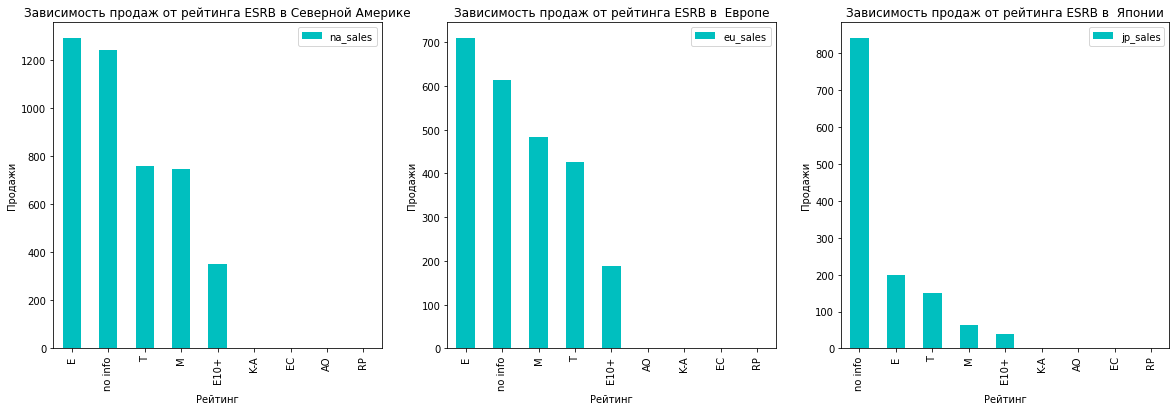

In [35]:
# построим зависимость продаж от рейтинга ESRB по регионам
fig, axes = plt.subplots(1, 3, figsize=(20,6))
plot ('rating','na_sales', 0, 'Зависимость продаж от рейтинга ESRB в Северной Америке', 'Рейтинг','Продажи')
plot ('rating','eu_sales', 1, 'Зависимость продаж от рейтинга ESRB в  Европе', 'Рейтинг', 'Продажи')
plot ('rating','jp_sales', 2, 'Зависимость продаж от рейтинга ESRB в  Японии', 'Рейтинг', 'Продажи')

* `EC` - «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше
* `E` - «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше
* `K-A` - «Для детей и взрослых»: Содержание игры вполне подходит для возрастной категории от 6 лет и старше
* `E10+` - «Для всех старше 10 лет»: Возрастная категория — от 10 лет
* `T` - «Подросткам»: Игра подходит для лиц от 13 лет и старше
* `M` - «От 17 лет»: Материалы игры не подходят для подростков младше 17 лет
* `AO` - «Только для взрослых»: Содержание игры только для взрослых (18+)
* `RP` - «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга

Жители Северной Америки, Европы и Японии выбирают для покупки похожие игры. На продажи влияют четыре рейтинга «E»,«T»,«M» и «E10+».
Игры без рейтинга на втором месте по прибыли в Европе и Северной Америке. Самый популярный «E» и далее «T»,«M» и «E10+». За исключением Европы, где игры с рейтингом «M» популярнее «T». Очень много игр, где рейтинг не определен. В Японии таких проданных игр большинство. Это значит, что японцы мало обращают внимание на рейтинг при покупке игры.

## Проверка гипотез
<a id="hypothesis"></a>

### Гипотеза 1

**Нулевая гипотеза:**
cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Альтернативная гипотеза:** 
cредние пользовательские рейтинги платформ Xbox One и PC отличаются друг от друга

In [36]:
# проверим нулевую гипотезу о равенстве
xone = df[(df['platform']=='XOne') & (df['user_score'] <= 10)]['user_score']
pc = df[(df['platform']=='PC') & (df['user_score'] <= 10)]['user_score']

alpha = .05 # критический уровень статистической значимости
results = st.ttest_ind(
    xone, 
    pc,
    equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, альтернативную не отвергаем")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.935072360183565e-06
Отвергаем нулевую гипотезу, альтернативную не отвергаем


### Гипотеза 2

**Нулевая гипотеза:**
cредние пользовательские рейтинги жанров Action и Sports одинаковые

**Альтернативная гипотеза:** 
cредние пользовательские рейтинги жанров Action и Sports разные

In [37]:
# проверим нулевую гипотезу о равенстве
action = df[(df['genre']=='Action') & (df['user_score'] <= 10)]['user_score']
sports = df[(df['genre']=='Sports') & (df['user_score'] <= 10)]['user_score']

alpha = .05 # критический уровень статистической значимости
results = st.ttest_ind(
    action, 
    sports,
    equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, альтернативную не отвергаем")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


Для проверки гипотезы 1 и  гипотезы 2 мы использовали `scipy.stats.ttest_ind (array1, array2, equal_var)`. Это специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Предположим, что выборки разного размера. Возьмем параметр `equal_var = False`. 

В первом случае мы отвергли нулевую гипотезу о равенстве, альтернативную не отвергли.
Во втором случае не получилось отвергнуть нулевую гипотезу.

## Общий вывод
<a id="output"></a>

В работе мы проанализировали исторические данные с 1980 до 2016 года из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы с целью выявить определяющие успешность игры закономерности.

С 1980 года выпускалось очень мало игр. Темп появления новых игр начал уверенно расти с 1994 года. В 2008-2009 был самый пик популярности компьютерных игр. В 2012 темп выпуска снизился почти в два раза и держался примерно на одном уровне до 2016 года.

Исходя из статистики средний срок срок существования игровых платформ составляет 10 лет. Пика популярности платформа достигает через 4-6 лет после релиза. Далее продажи идут на спад и достигают нуля.

Для прогнозирования потенциально прибыльной платформы взяли промежуток в 3 года. За этот период платформа достигает пика популярности. Слишком длинный временной отрезок для анализа брать не стоит, т.к. рынок компьютерных игр очень динамичен. Так мы увидим прибыль от каких платформ пошла на спад, а какие только набирают популярность. Для прогноза на 2017 год возьмем период с 2014 по 2016 год. 

2016 год был не слишком прибыльным в плане продаж компьютерных игр. Выделяются платформы PS4, XOne, которые появились в 2013 году, но уже стартанули вверх по продажам. Также продажи по платформе WiiU, которая появилась в 2012, достаточно стабильны. Исходя из статистики эти платформы просуществуют на рынке как минимум 6 лет, а в 2017 году ещё могут побороться за звание самых продаваемых при грамотном маркетинге. Продажи по всем остальным платформам сильно падают. Делать ставку в 2017 году на них не стоит.

Отзывы критиков довольно сильно влияют на продажи. На это стоит обратить внимание при составлении прогноза. Нет смысла продвигать игровую платформу, если она не получила одобрения критиков.

В тройку самых прибыльных жанров входят Shooter, Sports и Platform. Очень много выпускается игр жанра Adventure, но это один из самых неприбыльных жанров. Жанры Puzzle и Strategy на последнем месте как по количеству выпускаемых игр, так и по прибыли.

По регионам Северная Америка - самый большой рынок компьютерных игр по сравнению с Европой и Японией. В Японии меньше покупают игры, чем в других регионах. Role-Playing самый популярный жанр в Японии. В остальных страных этот жанр даже не входит в пятерку лидеров. Японцы также неохотно покупают игры жанра Shooter.
Жанры Action, Sports и Misc входят в топ-5 по продажам во всех регионах. Их можно продвигать везде.
Игры на Platform популярны в Японии и Северной Америке. На европейском рынке лучше продвигать жанр Shooter и Racing. Shooter также нравится американцам.

PS2 - одна из самых популярных игр по всем регионам. Её ранняя и поздняя версии PS и PS3 также вошли пятерку лидеров по регионам. PS4 скорей всего таже будет прибыльна во всех странах. 
X360 и Wii популярны как в Северной Америке, так и в Европе. X360 самая продаваемая игра в Северной Америке.
XOne и WiiU лучше продвигать на европейском и американском рынках.
Японцы предпочитают игры собственного производства, поэтому продвигать на этом рынке стоит игры японского происхождения.

Влияние рейтинга ESRB на продажи в разных регионах почти одинаково. Рейтинги «E»,«T»,«M» и «E10+» популярны везде. Очень много игр, где рейтинг не определен. В Японии таких проданных игр большинство. Это значит, что японцы мало обращают внимание на рейтинг при покупке игры.

Для получения наибольшей прибыли рекомендуем сосредоточится на продвижении игр в Европе и Северной Америке. Это 2 самых больших рынка. Рынок Японии очень специфичен и не приносит большого дохода. В Японии лучше продвигать игры японского происхождения.